# Building Recognition Code

Based on code provided by Dr. TG

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

# Input data files are available in the "../input/" directory.
import os
#print(os.listdir("./input"))

ModuleNotFoundError: No module named 'cv2'

In [ ]:
pip install opencv-python==4.8.0.74

In [6]:
import cv2

(280, 300, 3)


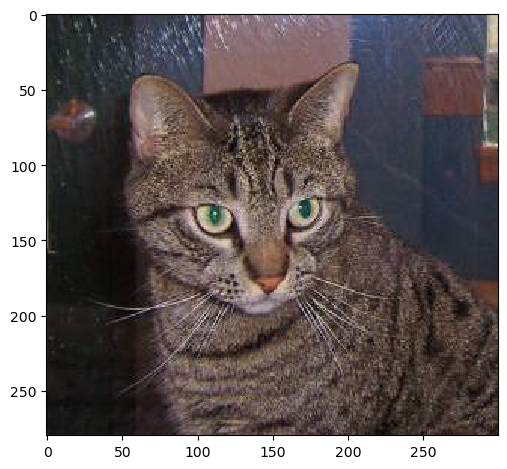

In [7]:
from skimage import io
cat1 = io.imread('./input/training_set/training_set/cats/cat.1.jpg')
io.imshow(cat1)
print(cat1.shape)

In [91]:
from skimage.feature import hog, daisy
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics

image:  (280, 300, 3)


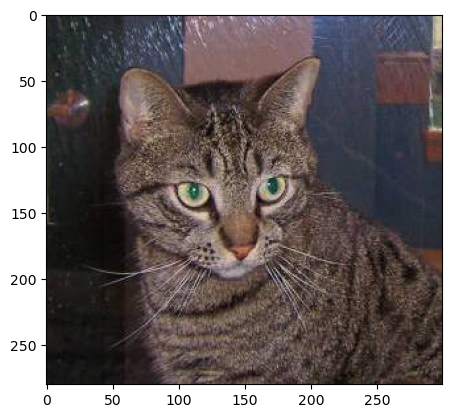

In [9]:
img = np.array(mpimg.imread('./input/training_set/training_set/cats/cat.1.jpg'))
img.setflags(write = 1)
print('image: ', img.shape)
plt.imshow(img)
plt.show()

# pre-processing

image:  (128, 64, 3)


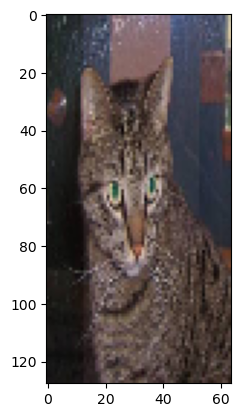

In [10]:
resized_img = cv2.resize(img, (64,128))
print('image: ', resized_img.shape)
plt.imshow(resized_img)
plt.show()

# feature extration

# Histogram of Oriented Gradients (HOG)

It analyzes the distribution of edge orientations within an object to describe its shape and appearance. The HOG method involves computing the gradient magnitude and orientation for each pixel in an image and then dividing the image into small cells.

(6804,)
[0.18354176 0.01225054 0.03909749 ... 0.03729619 0.02809741 0.06744869]
(128, 64)


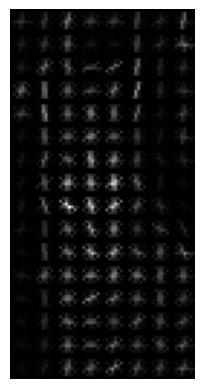

In [11]:
fd, hog_image = hog(resized_img, visualize=True, channel_axis =2)
print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [12]:
hog_image

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.78554016, ..., 1.50765026, 0.        ,
        0.        ],
       [0.        , 1.01544064, 0.        , ..., 0.        , 1.05043697,
        0.        ],
       ...,
       [0.        , 1.36817682, 0.        , ..., 0.        , 4.40985692,
        0.        ],
       [0.        , 0.        , 0.94192094, ..., 0.95077384, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Dense DAISY feature description

"The DAISY local image descriptor is based on gradient orientation histograms similar to the SIFT descriptor. It is formulated in a way that allows for fast dense extraction which is useful for e.g. bag-of-features image representations." -scikit-image.org

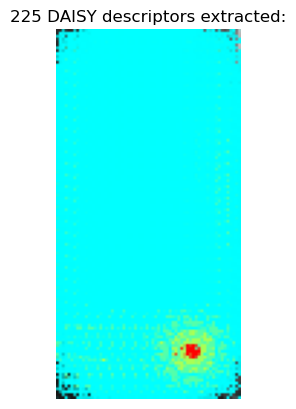

In [18]:
fd, daisy_image = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY), visualize=True)

fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(daisy_image)
daisy_num = fd.shape[0] * fd.shape[1]
ax.set_title(f"{daisy_num} DAISY descriptors extracted:")
plt.show()

In [19]:
data_dogs_hog = []

for entry in glob.glob("./input/training_set/training_set/dogs/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_dogs_hog.append(fd)
    
data_cats_hog = []

for entry in glob.glob("./input/training_set/training_set/cats/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_cats_hog.append(fd)
    
train_data_hog = data_dogs_hog+data_cats_hog
print(len(train_data_hog))

8005


In [36]:
data_dogs_daisy = []

for entry in glob.glob("./input/training_set/training_set/dogs/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_dogs_daisy.append(fd.flatten())
    
data_cats_daisy = []

for entry in glob.glob("./input/training_set/training_set/cats/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_cats_daisy.append(fd.flatten())
    
train_data_daisy = data_dogs_daisy+data_cats_daisy
print(len(train_data_daisy))

8005


In [21]:
train_label_list_hog = []
for i in range (len(train_data_hog)):
    if i<4000:
        train_label_list_hog.append('dog')
    else:
        train_label_list_hog.append('cat')
        
#print(train_label_list)
print(len(train_label_list_hog))

8005


In [37]:
train_label_list_daisy = []
for i in range (len(train_data_daisy)):
    if i<4000:
        train_label_list_daisy.append('dog')
    else:
        train_label_list_daisy.append('cat')
        
#print(train_label_list)
print(len(train_label_list_daisy))

8005


In [24]:
test_dogs_hog = []

for entry in glob.glob("./input/test_set/test_set/dogs/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    test_dict = {'data':fd, 'label':'dog'}
    test_dogs_hog.append(test_dict)
    
test_cats_hog = []

for entry in glob.glob("./input/test_set/test_set/cats/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    test_dict = {'data':fd, 'label':'cat'}
    test_cats_hog.append(test_dict)
    
test_data_hog = test_dogs_hog+test_cats_hog
print(len(test_data_hog))

2023


In [38]:
test_dogs_daisy = []

for entry in glob.glob("./input/test_set/test_set/dogs/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    test_dict = {'data':fd.flatten(), 'label':'dog'}
    test_dogs_daisy.append(test_dict)
    
test_cats_daisy = []

for entry in glob.glob("./input/test_set/test_set/cats/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    test_dict = {'data':fd.flatten(), 'label':'cat'}
    test_cats_daisy.append(test_dict)
    
test_data_daisy = test_dogs_daisy+test_cats_daisy
print(len(test_data_daisy))

2023


In [26]:
test_features_hog = []
test_labels_hog = []

for i in test_data_hog:
    test_labels_hog.append(i['label'])
    test_features_hog.append(i['data'])
    
print(len(test_features_hog))

2023


In [39]:
test_features_daisy = []
test_labels_daisy = []

for i in test_data_daisy:
    test_labels_daisy.append(i['label'])
    test_features_daisy.append(i['data'])
    
print(len(test_features_daisy))

2023


In [66]:
#Capturing accuracies for each algorithm to chart later
hog_accuracies = []
daisy_accuracies = []
labels = ["KNN Euclidean", "KNN Manhattan", "Gaussian NB", "Bernoulli NB", "Logistic Regression", "SGD"]

In [67]:
x_axis_k_points = []

f1_euclidean = []
accuracies_euclidean = []
conf_matrix_euclidean = []

for k in range(7):
    knn_euclidean = KNeighborsClassifier(n_neighbors = k+1)
    knn_euclidean.fit(train_data_hog, train_label_list_hog)
    
    pred_labels_euclidean = knn_euclidean.predict(test_features_hog)
    
    acc_euclidean = knn_euclidean.score(test_features_hog, test_labels_hog)
    accuracies_euclidean.append(acc_euclidean)
    
    conf_matrix_euclidean.append(metrics.confusion_matrix(test_labels_hog, pred_labels_euclidean))
    
    f1_euclidean.append(metrics.f1_score(test_labels_hog, pred_labels_euclidean, pos_label = 'dog'))
    
    x_axis_k_points.append(k+1)
hog_accuracies.append(max(accuracies_euclidean))

In [75]:
print("K Nearest Neighbors Euclidean using HOG")
for i in range(len(f1_euclidean)):
    print('FOR K = ', i+1, ', F1 SCORE = ', f1_euclidean[i], ', ACCURACY = ',
         accuracies_euclidean[i], ', \nCONFUSION MATRIX: \n', conf_matrix_euclidean[i])

K Nearest Neighbors Euclidean using HOG
FOR K =  1 , F1 SCORE =  0.6423290203327172 , ACCURACY =  0.6173999011369253 , 
CONFUSION MATRIX: 
 [[554 457]
 [317 695]]
FOR K =  2 , F1 SCORE =  0.5747899159663866 , ACCURACY =  0.6248146317350469 , 
CONFUSION MATRIX: 
 [[751 260]
 [499 513]]
FOR K =  3 , F1 SCORE =  0.6604026845637584 , ACCURACY =  0.6248146317350469 , 
CONFUSION MATRIX: 
 [[526 485]
 [274 738]]
FOR K =  4 , F1 SCORE =  0.6314720812182741 , ACCURACY =  0.6411270390509145 , 
CONFUSION MATRIX: 
 [[675 336]
 [390 622]]
FOR K =  5 , F1 SCORE =  0.687029659141213 , ACCURACY =  0.6505190311418685 , 
CONFUSION MATRIX: 
 [[540 471]
 [236 776]]
FOR K =  6 , F1 SCORE =  0.6673067690830533 , ACCURACY =  0.657439446366782 , 
CONFUSION MATRIX: 
 [[635 376]
 [317 695]]
FOR K =  7 , F1 SCORE =  0.6987429562201993 , ACCURACY =  0.6564508156203658 , 
CONFUSION MATRIX: 
 [[522 489]
 [206 806]]


In [68]:
x_axis_k_points = []

f1_manhattan = []
accuracies_manhattan = []
conf_matrix_manhattan = []

for k in range(7):
    knn_manhattan = KNeighborsClassifier(n_neighbors = k+1, p=1)
    knn_manhattan.fit(train_data_hog, train_label_list_hog)
    
    pred_labels_manhattan = knn_manhattan.predict(test_features_hog)
    
    acc_manhattan = knn_manhattan.score(test_features_hog, test_labels_hog)
    accuracies_manhattan.append(acc_manhattan)
    
    conf_matrix_manhattan.append(metrics.confusion_matrix(test_labels_hog, pred_labels_manhattan))
    
    f1_manhattan.append(metrics.f1_score(test_labels_hog, pred_labels_manhattan, pos_label = 'dog'))
    
    x_axis_k_points.append(k+1)
hog_accuracies.append(max(accuracies_manhattan))

In [76]:
print("K Nearest Neighbors Manhattan using HOG")
for i in range(len(f1_manhattan )):
    print('FOR K = ', i+1, ', F1 SCORE = ', f1_manhattan[i], ', ACCURACY = ',
         accuracies_manhattan[i], ', \nCONFUSION MATRIX: \n', conf_matrix_manhattan[i])

K Nearest Neighbors Manhattan using HOG
FOR K =  1 , F1 SCORE =  0.6478743068391868 , ACCURACY =  0.6233316856154226 , 
CONFUSION MATRIX: 
 [[560 451]
 [311 701]]
FOR K =  2 , F1 SCORE =  0.5751266178953292 , ACCURACY =  0.6267918932278794 , 
CONFUSION MATRIX: 
 [[757 254]
 [501 511]]
FOR K =  3 , F1 SCORE =  0.6892857142857144 , ACCURACY =  0.6559565002471577 , 
CONFUSION MATRIX: 
 [[555 456]
 [240 772]]
FOR K =  4 , F1 SCORE =  0.6417986714358712 , ACCURACY =  0.6534849233811172 , 
CONFUSION MATRIX: 
 [[694 317]
 [384 628]]
FOR K =  5 , F1 SCORE =  0.7034120734908136 , ACCURACY =  0.6648541769649036 , 
CONFUSION MATRIX: 
 [[541 470]
 [208 804]]
FOR K =  6 , F1 SCORE =  0.6806028196402529 , ACCURACY =  0.6752347998022739 , 
CONFUSION MATRIX: 
 [[666 345]
 [312 700]]
FOR K =  7 , F1 SCORE =  0.7053223712678495 , ACCURACY =  0.6633712308452793 , 
CONFUSION MATRIX: 
 [[527 484]
 [197 815]]


In [69]:
x_axis_k_points = []

f1_euclidean = []
accuracies_euclidean = []
conf_matrix_euclidean = []

for k in range(7):
    knn_euclidean = KNeighborsClassifier(n_neighbors = k+1)
    knn_euclidean.fit(train_data_daisy, train_label_list_daisy)
    
    pred_labels_euclidean = knn_euclidean.predict(test_features_daisy)
    
    acc_euclidean = knn_euclidean.score(test_features_daisy, test_labels_daisy)
    accuracies_euclidean.append(acc_euclidean)
    
    conf_matrix_euclidean.append(metrics.confusion_matrix(test_labels_daisy, pred_labels_euclidean))
    
    f1_euclidean.append(metrics.f1_score(test_labels_daisy, pred_labels_euclidean, pos_label = 'dog'))
    
    x_axis_k_points.append(k+1)
daisy_accuracies.append(max(accuracies_euclidean))

In [41]:
print("K Nearest Neighbors Euclidean using Daisy")
for i in range(len(f1_euclidean)):
    print('FOR K = ', i+1, ', F1 SCORE = ', f1_euclidean[i], ', ACCURACY = ',
         accuracies_euclidean[i], ', \nCONFUSION MATRIX: \n', conf_matrix_euclidean[i])

K Nearest Neighbors Euclidean using Daisy
FOR K =  1 , F1 SCORE =  0.6423290203327172 , ACCURACY =  0.6173999011369253 , 
CONFUSION MATRIX: 
 [[554 457]
 [317 695]]
FOR K =  2 , F1 SCORE =  0.5747899159663866 , ACCURACY =  0.6248146317350469 , 
CONFUSION MATRIX: 
 [[751 260]
 [499 513]]
FOR K =  3 , F1 SCORE =  0.6604026845637584 , ACCURACY =  0.6248146317350469 , 
CONFUSION MATRIX: 
 [[526 485]
 [274 738]]
FOR K =  4 , F1 SCORE =  0.6314720812182741 , ACCURACY =  0.6411270390509145 , 
CONFUSION MATRIX: 
 [[675 336]
 [390 622]]
FOR K =  5 , F1 SCORE =  0.687029659141213 , ACCURACY =  0.6505190311418685 , 
CONFUSION MATRIX: 
 [[540 471]
 [236 776]]
FOR K =  6 , F1 SCORE =  0.6673067690830533 , ACCURACY =  0.657439446366782 , 
CONFUSION MATRIX: 
 [[635 376]
 [317 695]]
FOR K =  7 , F1 SCORE =  0.6987429562201993 , ACCURACY =  0.6564508156203658 , 
CONFUSION MATRIX: 
 [[522 489]
 [206 806]]


In [70]:
x_axis_k_points = []

f1_manhattan = []
accuracies_manhattan = []
conf_matrix_manhattan = []

for k in range(7):
    knn_manhattan = KNeighborsClassifier(n_neighbors = k+1, p=1)
    knn_manhattan.fit(train_data_daisy, train_label_list_daisy)
    
    pred_labels_manhattan = knn_manhattan.predict(test_features_daisy)
    
    acc_manhattan = knn_manhattan.score(test_features_daisy, test_labels_daisy)
    accuracies_manhattan.append(acc_manhattan)
    
    conf_matrix_manhattan.append(metrics.confusion_matrix(test_labels_daisy, pred_labels_manhattan))
    
    f1_manhattan.append(metrics.f1_score(test_labels_daisy, pred_labels_manhattan, pos_label = 'dog'))
    
    x_axis_k_points.append(k+1)
daisy_accuracies.append(max(accuracies_manhattan))

In [43]:
print("K Nearest Neighbors Manhattan using Daisy")
for i in range(len(f1_manhattan )):
    print('FOR K = ', i+1, ', F1 SCORE = ', f1_manhattan[i], ', ACCURACY = ',
         accuracies_manhattan[i], ', \nCONFUSION MATRIX: \n', conf_matrix_manhattan[i])

K Nearest Neighbors Manhattan using Daisy
FOR K =  1 , F1 SCORE =  0.6478743068391868 , ACCURACY =  0.6233316856154226 , 
CONFUSION MATRIX: 
 [[560 451]
 [311 701]]
FOR K =  2 , F1 SCORE =  0.5751266178953292 , ACCURACY =  0.6267918932278794 , 
CONFUSION MATRIX: 
 [[757 254]
 [501 511]]
FOR K =  3 , F1 SCORE =  0.6892857142857144 , ACCURACY =  0.6559565002471577 , 
CONFUSION MATRIX: 
 [[555 456]
 [240 772]]
FOR K =  4 , F1 SCORE =  0.6417986714358712 , ACCURACY =  0.6534849233811172 , 
CONFUSION MATRIX: 
 [[694 317]
 [384 628]]
FOR K =  5 , F1 SCORE =  0.7034120734908136 , ACCURACY =  0.6648541769649036 , 
CONFUSION MATRIX: 
 [[541 470]
 [208 804]]
FOR K =  6 , F1 SCORE =  0.6806028196402529 , ACCURACY =  0.6752347998022739 , 
CONFUSION MATRIX: 
 [[666 345]
 [312 700]]
FOR K =  7 , F1 SCORE =  0.7053223712678495 , ACCURACY =  0.6633712308452793 , 
CONFUSION MATRIX: 
 [[527 484]
 [197 815]]


In [71]:
#Gaussian Naive Bayes HOG
gnb = GaussianNB()
gnb.fit(train_data_hog, train_label_list_hog)
    
pred_labels_gaussian = gnb.predict(test_features_hog)
    
acc_gaussian = gnb.score(test_features_hog, test_labels_hog)
    
conf_matrix_gaussian = metrics.confusion_matrix(test_labels_hog, pred_labels_gaussian)
    
f1_gaussian = metrics.f1_score(test_labels_hog, pred_labels_gaussian, pos_label = 'dog')

print("Gaussian Naive Bayes using HOG")
print('F1 SCORE = ', f1_gaussian, ', ACCURACY = ',
         acc_gaussian, ', \nCONFUSION MATRIX: \n', conf_matrix_gaussian)
hog_accuracies.append(acc_gaussian)

Gaussian Naive Bayes using HOG
F1 SCORE =  0.7038834951456311 , ACCURACY =  0.6984676223430548 , 
CONFUSION MATRIX: 
 [[688 323]
 [287 725]]


In [72]:
#Bernoulli Naive Bayes HOG
bnb = BernoulliNB()
bnb.fit(train_data_hog, train_label_list_hog)
    
pred_labels_bernoulli = bnb.predict(test_features_hog)
    
acc_bernoulli = bnb.score(test_features_hog, test_labels_hog)
    
conf_matrix_bernoulli = metrics.confusion_matrix(test_labels_hog, pred_labels_bernoulli)
    
f1_bernoulli = metrics.f1_score(test_labels_hog, pred_labels_bernoulli, pos_label = 'dog')

print("Bernoulli Naive Bayes using HOG")
print('F1 SCORE = ', f1_bernoulli, ', ACCURACY = ',
         acc_bernoulli, ', \nCONFUSION MATRIX: \n', conf_matrix_bernoulli)
hog_accuracies.append(acc_bernoulli)

Bernoulli Naive Bayes using HOG
F1 SCORE =  0.6420182688125272 , ACCURACY =  0.5931784478497282 , 
CONFUSION MATRIX: 
 [[462 549]
 [274 738]]


In [78]:
#Gaussian Naive Bayes Daisy
gnb = GaussianNB()
gnb.fit(train_data_daisy, train_label_list_daisy)
    
pred_labels_gaussian = gnb.predict(test_features_daisy)
    
acc_gaussian = gnb.score(test_features_daisy, test_labels_daisy)
    
conf_matrix_gaussian = metrics.confusion_matrix(test_labels_daisy, pred_labels_gaussian)
    
f1_gaussian = metrics.f1_score(test_labels_daisy, pred_labels_gaussian, pos_label = 'dog')

print("Gaussian Naive Bayes using Daisy")
print('F1 SCORE = ', f1_gaussian, ', ACCURACY = ',
         acc_gaussian, ', \nCONFUSION MATRIX: \n', conf_matrix_gaussian)
daisy_accuracies.append(acc_gaussian)

Gaussian Naive Bayes using Daisy
F1 SCORE =  0.6654627539503386 , ACCURACY =  0.6337123084527929 , 
CONFUSION MATRIX: 
 [[545 466]
 [275 737]]


In [79]:
#Bernoulli Naive Bayes Daisy
bnb = BernoulliNB()
bnb.fit(train_data_daisy, train_label_list_daisy)
    
pred_labels_bernoulli = bnb.predict(test_features_daisy)
    
acc_bernoulli = bnb.score(test_features_daisy, test_labels_daisy)
    
conf_matrix_bernoulli = metrics.confusion_matrix(test_labels_daisy, pred_labels_bernoulli)
    
f1_bernoulli = metrics.f1_score(test_labels_daisy, pred_labels_bernoulli, pos_label = 'dog')

print("Bernoulli Naive Bayes using Daisy")
print('F1 SCORE = ', f1_bernoulli, ', ACCURACY = ',
         acc_bernoulli, ', \nCONFUSION MATRIX: \n', conf_matrix_bernoulli)
daisy_accuracies.append(acc_bernoulli)

Bernoulli Naive Bayes using Daisy
F1 SCORE =  0.0 , ACCURACY =  0.49975284231339595 , 
CONFUSION MATRIX: 
 [[1011    0]
 [1012    0]]


In [80]:
#Logistic Regression HOG
lr = LogisticRegression()
lr.fit(train_data_hog, train_label_list_hog)
    
pred_labels_lr = lr.predict(test_features_hog)
    
acc_lr = lr.score(test_features_hog, test_labels_hog)
    
conf_matrix_lr = metrics.confusion_matrix(test_labels_hog, pred_labels_lr)
    
f1_lr = metrics.f1_score(test_labels_hog, pred_labels_lr, pos_label = 'dog')

print("Logistic Regression using HOG")
print('F1 SCORE = ', f1_lr, ', ACCURACY = ',
         acc_lr, ', \nCONFUSION MATRIX: \n', conf_matrix_lr)
hog_accuracies.append(acc_lr)

Logistic Regression using HOG
F1 SCORE =  0.7295162882527148 , ACCURACY =  0.7291151754819575 , 
CONFUSION MATRIX: 
 [[736 275]
 [273 739]]


C:\Users\harrison.hennessy\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
#Logistic Regression Daisy
lr = LogisticRegression()
lr.fit(train_data_daisy, train_label_list_daisy)
    
pred_labels_lr = lr.predict(test_features_daisy)
    
acc_lr = lr.score(test_features_daisy, test_labels_daisy)
    
conf_matrix_lr = metrics.confusion_matrix(test_labels_daisy, pred_labels_lr)
    
f1_lr = metrics.f1_score(test_labels_daisy, pred_labels_lr, pos_label = 'dog')

print("Logistic Regression using Daisy")
print('F1 SCORE = ', f1_lr, ', ACCURACY = ',
         acc_lr, ', \nCONFUSION MATRIX: \n', conf_matrix_lr)
daisy_accuracies.append(acc_lr)

Logistic Regression using Daisy
F1 SCORE =  0.6699029126213591 , ACCURACY =  0.6638655462184874 , 
CONFUSION MATRIX: 
 [[653 358]
 [322 690]]


In [82]:
#Stochastic Gradient Descent HOG
sgd = SGDClassifier()
sgd.fit(train_data_hog, train_label_list_hog)
    
pred_labels_sgd = sgd.predict(test_features_hog)
    
acc_sgd = sgd.score(test_features_hog, test_labels_hog)
    
conf_matrix_sgd = metrics.confusion_matrix(test_labels_hog, pred_labels_sgd)
    
f1_sgd = metrics.f1_score(test_labels_hog, pred_labels_sgd, pos_label = 'dog')

print("SGD using HOG")
print('F1 SCORE = ', f1_sgd, ', ACCURACY = ',
         acc_sgd, ', \nCONFUSION MATRIX: \n', conf_matrix_sgd)
hog_accuracies.append(acc_sgd)

SGD using HOG
F1 SCORE =  0.7111785533636824 , ACCURACY =  0.717745921898171 , 
CONFUSION MATRIX: 
 [[749 262]
 [309 703]]


In [83]:
#Stochastic Gradient Descent Daisy
sgd = SGDClassifier()
sgd.fit(train_data_daisy, train_label_list_daisy)
    
pred_labels_sgd = sgd.predict(test_features_daisy)
    
acc_sgd = sgd.score(test_features_daisy, test_labels_daisy)
    
conf_matrix_sgd = metrics.confusion_matrix(test_labels_daisy, pred_labels_sgd)
    
f1_sgd = metrics.f1_score(test_labels_daisy, pred_labels_sgd, pos_label = 'dog')

print("SGD using Daisy")
print('F1 SCORE = ', f1_sgd, ', ACCURACY = ',
         acc_sgd, ', \nCONFUSION MATRIX: \n', conf_matrix_sgd)
daisy_accuracies.append(acc_sgd)

SGD using Daisy
F1 SCORE =  0.09392265193370164 , ACCURACY =  0.513593672763223 , 
CONFUSION MATRIX: 
 [[988  23]
 [961  51]]


In [84]:
print(hog_accuracies)
print(daisy_accuracies)

[0.6510133465150766, 0.6737518536826496, 0.6984676223430548, 0.5931784478497282, 0.7291151754819575, 0.717745921898171]
[0.657439446366782, 0.6752347998022739, 0.6337123084527929, 0.49975284231339595, 0.6638655462184874, 0.513593672763223]


Text(0.5, 1.0, 'Daisy Accuracies')

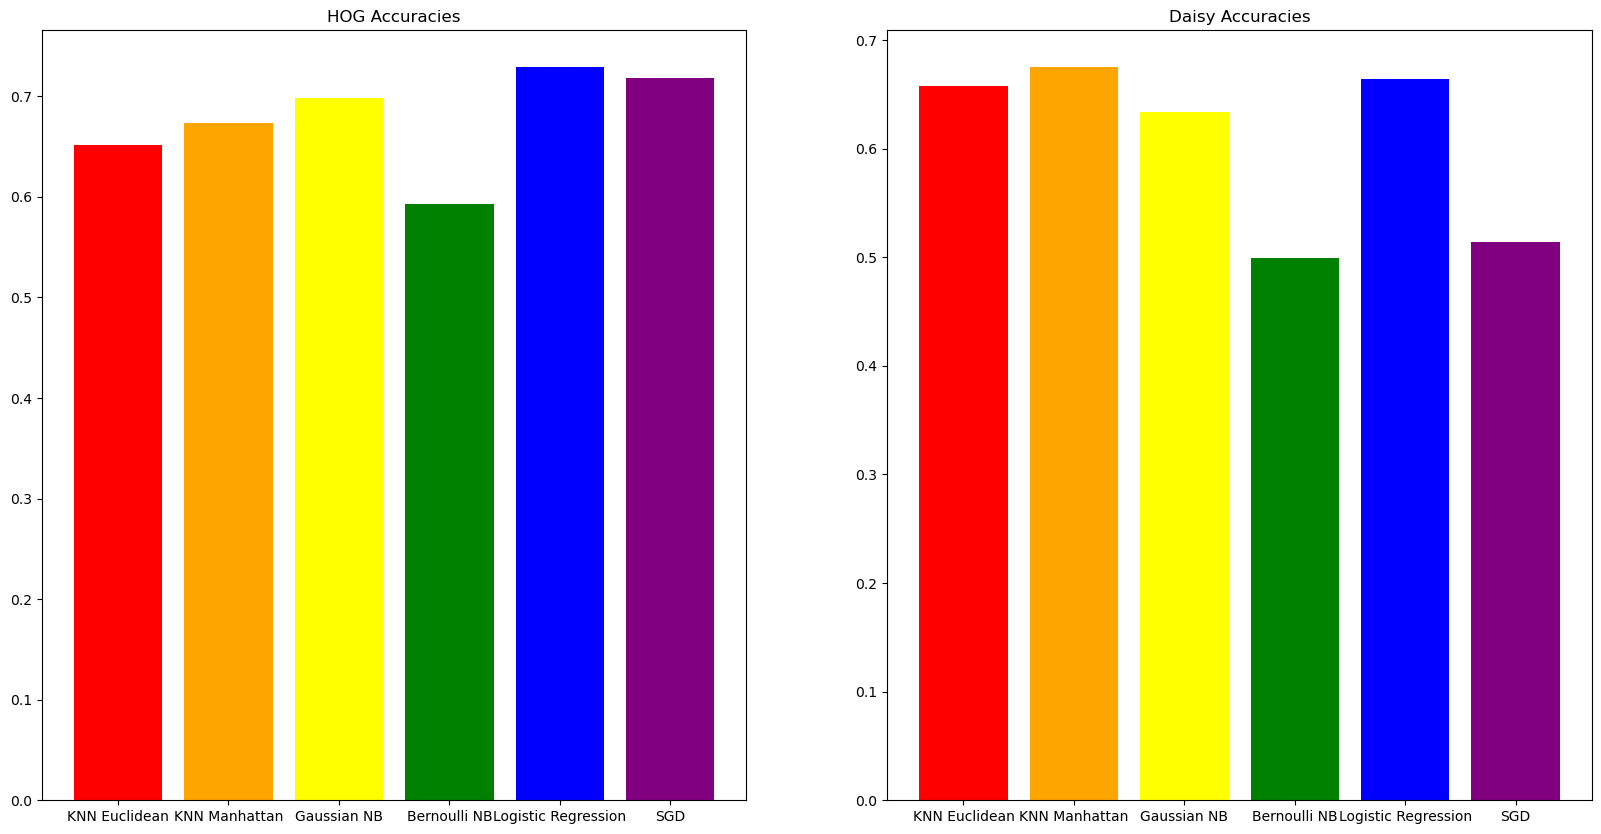

In [93]:
bar_x = [1,2,3,4,5,6]
colors = ["red", "orange", "yellow", "green", "blue", "purple"]
fig , ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].bar(x=bar_x, height=hog_accuracies, tick_label=labels, color=colors)
ax[0].set_title("HOG Accuracies")

ax[1].bar(x=bar_x, height=daisy_accuracies, tick_label=labels, color=colors)
ax[1].set_title("Daisy Accuracies")